## **ENTERTAINMENT COMPANY NETFLIX INC.**

---



<img src=https://biznis.rs/wp-content/uploads/2021/04/netflix.jpg>

1. IMPORT DATA BASE

  (Pandas and Numpy environment)

In [1]:
# IMPORT THE REQUIRED LIBRARIES
import pandas as pd               # Structured data management (Dataframe)
import numpy as np                # Matrix management
import matplotlib.pyplot as plt   # Graphs
import seaborn as sns             # Graphs
print(pd.__version__)

2.2.2


In [2]:
## 2.IMPORTAR BASE DE DATOS
##############################          VIDEOGAMES SALES ANALYSUS & VISUALIZATION          ##############################
# Crear DataFrame de Pandas
netflix_titles = "/content/netflix_titles.csv"
df_net = pd.read_csv(netflix_titles)

df_net.head(4) # Primera y últimas filas

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


> **1. DATABASE DISPLAY**

---





In [3]:
# 1. Dataset information
print("Data dimension: ",df_net.shape)
print("Data column: ",df_net.columns)

Data dimension:  (8807, 12)
Data column:  Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [4]:
# 2. Variable information
df_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


> **2. DATA CLEANING DEVELOPMENT**

---



In [5]:
# 2.1. Dupplicated value
df_net.duplicated().sum()

0

In [6]:
# Delete the dupplicates
df_net.drop_duplicates(inplace= True)

In [7]:
# 2.2. Missing value
df_net.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
# Define the object “missing”
def missing(df):

# Calculate missing value count for each column
    missing_value = df.isnull().sum()
    missing_value = missing_value.reset_index().rename(                         # reset_index(): Converts the result index into a column
                    columns={'index':'Column', 0:'Missing_value_count'})

# Calculate missing value percentage for each column
    missing_percent = df.isnull().sum() * 100 / df_net.shape[0]                 # Operation to get the percentage
    missing_percent = missing_percent.reset_index().rename(
                    columns={'index':'Column', 0:'Missing_Percentage (%)'}).round(2)

# We'll merge the previous results
    missing_Final = missing_value.merge(missing_percent, how = 'inner', left_on = 'Column', right_on = 'Column')
    missing_Final = missing_Final.sort_values(by = 'Missing_Percentage (%)',ascending = False)
    return missing_Final

missing(df_net)

,Column,Missing_value_count,Missing_Percentage (%)
3,director,2634,29.91
5,country,831,9.44
4,cast,825,9.37
6,date_added,10,0.11
8,rating,4,0.05
9,duration,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
7,release_year,0,0.00


In [9]:
# Copy Database
df = df_net.copy()

In [10]:
# Missing value processing
############################################## Case 1   (NaN ---> 'NULL')
# Replace values "NaN" in the columns
df.replace({'director': np.nan, 'country': np.nan, 'cast': np.nan},
          {'director': 'NULL', 'country': 'NULL', 'cast': 'NULL'},
          inplace=True)
                          # director (29.91 %)
                          # country  (9.44  %)
                          # cast     (9.37  %)

# Check to see if all NaN values are resolved
# Filter rows with "NULL" in some columns
NULL = df.loc[(df['director'] == 'NULL') |
             (df['country'] == 'NULL') |
             (df['cast'] == 'NULL')]

NULL.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NULL,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NULL,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NULL,NULL,NULL,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NULL,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [35]:
null_directors = df[df['director'] == 'NULL'].shape[0]
null_country = df[df['country'] == 'NULL'].shape[0]
null_cast = df[df['cast'] == 'NULL'].shape[0]
print("Count of directores NULL:", null_directors)
print("Count of country NULL:", null_country)
print("Count of cast NULL:", null_cast)

Count of directores NULL: 2589
Count of country NULL: 818
Count of cast NULL: 808


In [11]:
############################################## Case 2   (NaN ---> MODE)
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
# Check to see if all NaN values are resolved
df[df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [12]:
############################################## Case 3   (Dropping rows with NaN)
df = df.dropna(subset=["rating"])
# Check to see if all NaN values are resolved
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [13]:
############################################## Case 4   (translate values: var1 --> var2) and delete
import re # Working with regular expressions

# Function to verify if a string contains "min" o "Season"
def contain(valor):
    return bool(re.search(r'\b(min|Season)\b', str(valor), re.IGNORECASE))

# Filter rows with specific conditions
filter = df[(df['rating'].str.contains(r'\b(min|Season)\b', case=False)) & df['duration'].isnull()]

# Copy values: (rating --> duration) in rows filters
df.loc[filter.index, 'duration'] = df.loc[filter.index, 'rating']

# Dropping erroneous values in 'rating'
df.loc[filter.index, 'rating'] = np.nan

<ipython-input-13-8b9b410448f1>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filter = df[(df['rating'].str.contains(r'\b(min|Season)\b', case=False)) & df['duration'].isnull()]


In [14]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [15]:
missing(df)

,Column,Missing_value_count,Missing_Percentage (%)
8,rating,3,0.03
0,show_id,0,0.00
1,type,0,0.00
2,title,0,0.00
3,director,0,0.00
4,cast,0,0.00
5,country,0,0.00
6,date_added,0,0.00
7,release_year,0,0.00
9,duration,0,0.00


In [16]:
# 2.3. Invalid value

# Invalid value processing
df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})

<ipython-input-16-a6418c07df6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].replace({'TV-Y7-FV': 'TV-Y7'})


In [17]:
df = df[~df['title'].str.startswith('#')]              # Dropping rows started with "#" filas que empiezan con '#'

df = df[~df['title'].str.match(r'^\d{1,5}$')]          # Dropping rows that contains numbers from '1' to '99999'

df = df[df['title'].str.match('^[a-zA-Z]')]            # Dropping rows that does not begin with a letter
# Verifying
df[df['title'].str.contains('#')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


> **3. EDA ANALYSIS**

---


<ipython-input-18-9dadb9869ebe>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=df, palette="mako")


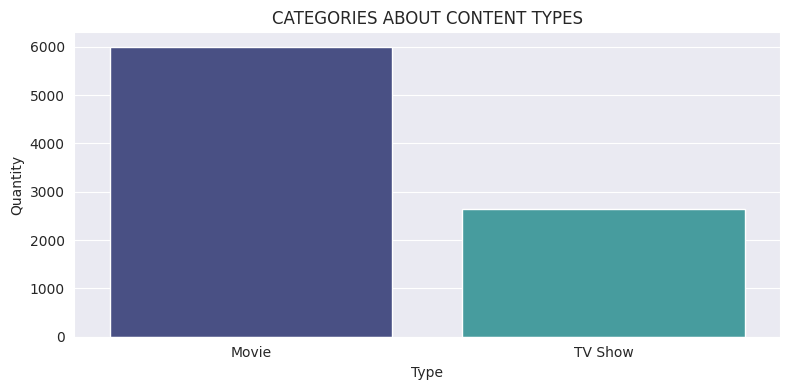

In [18]:
# 1. (HISTOGRAM)   ------> Variable "TYPE"
################################################################################
plt.figure(figsize=(8,4), tight_layout=True)
sns.set_style("darkgrid")
ax = sns.countplot(x="type", data=df, palette="mako")
ax.set(title='CATEGORIES ABOUT CONTENT TYPES', xlabel='Type', ylabel='Quantity')
plt.show()

<ipython-input-19-731c8cf8fd4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=df, palette="colorblind", order=df['rating'].value_counts().index[0:15])


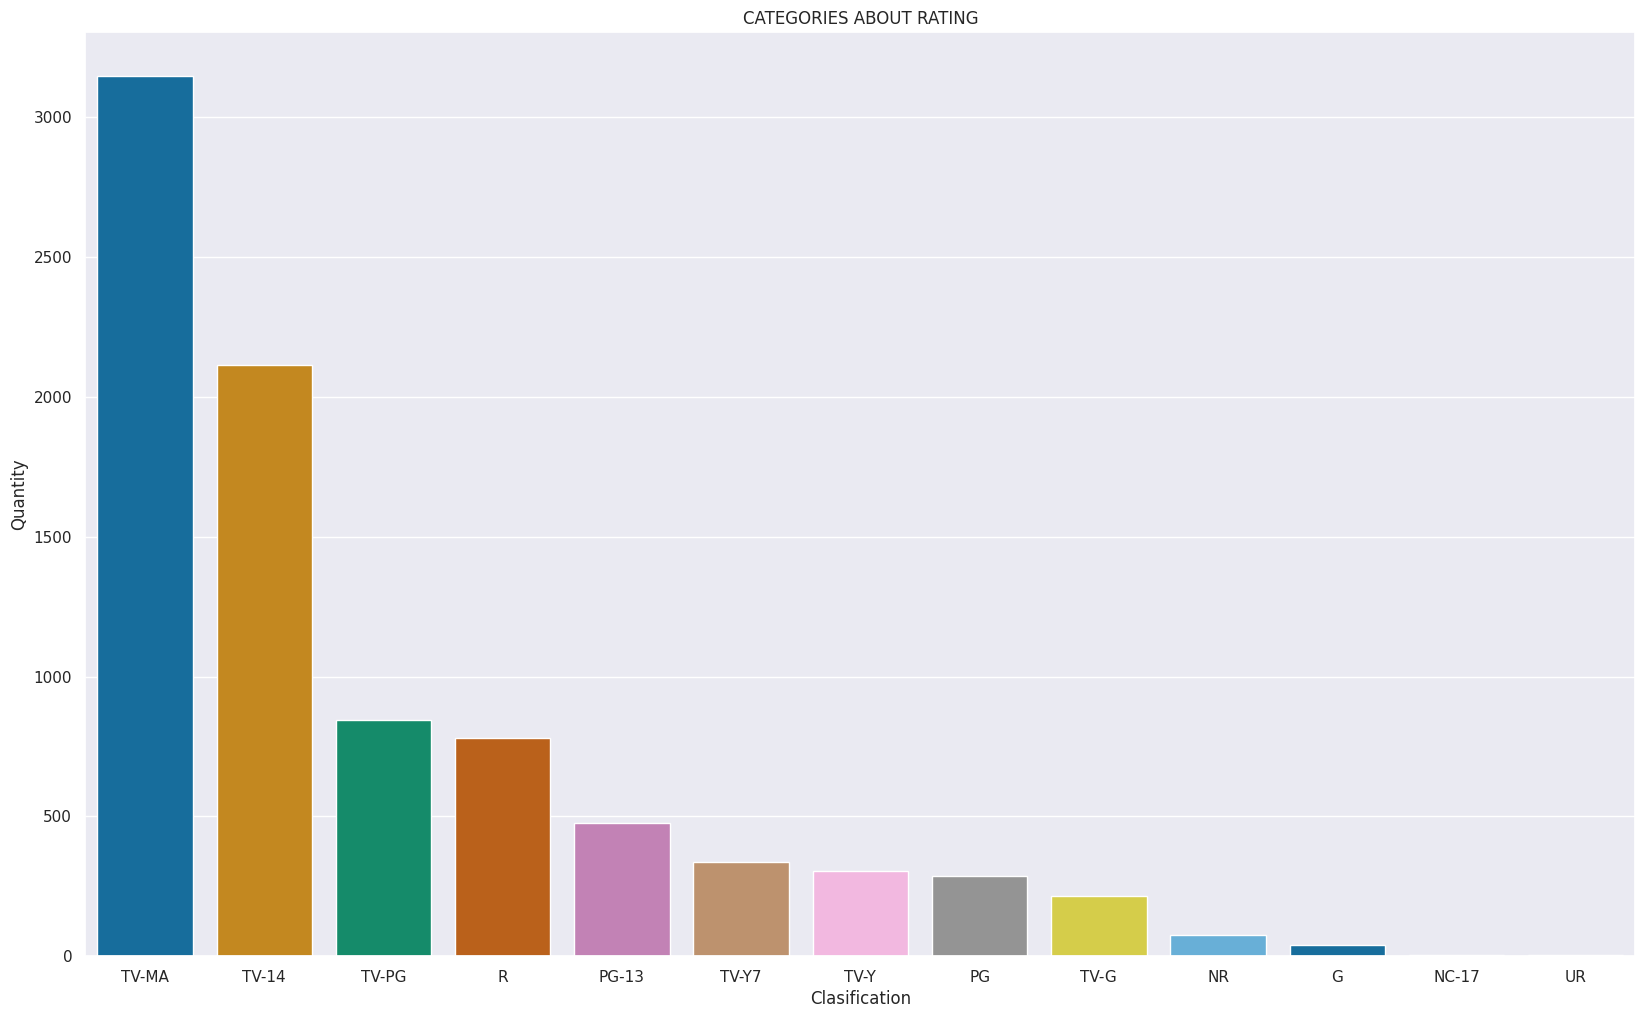

In [19]:
# 2. (BAR-PLOT)   ------> Variable "RATING"
################################################################################
plt.figure(figsize=(20,12))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=df, palette="colorblind", order=df['rating'].value_counts().index[0:15])
ax.set(title='CATEGORIES ABOUT RATING', xlabel='Clasification', ylabel='Quantity')
plt.show()

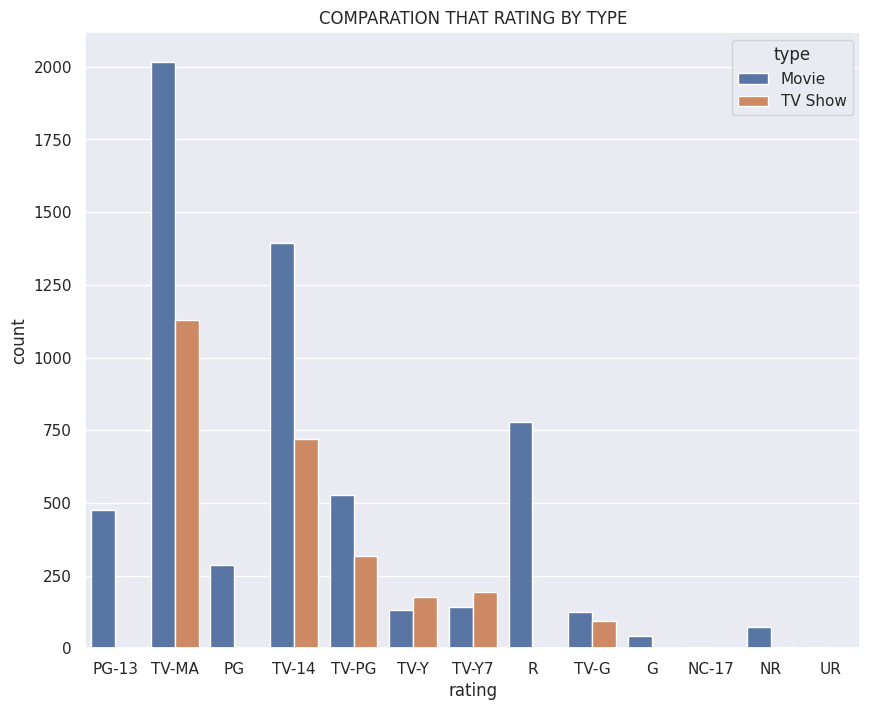

In [20]:
# 3. (BAR-PLOT)   ------> COMPARATIVE
################################################################################
plt.figure(figsize=(10,8))
sns.countplot(x='rating',hue='type',data=df)
plt.title('COMPARATION THAT RATING BY TYPE')
plt.show()

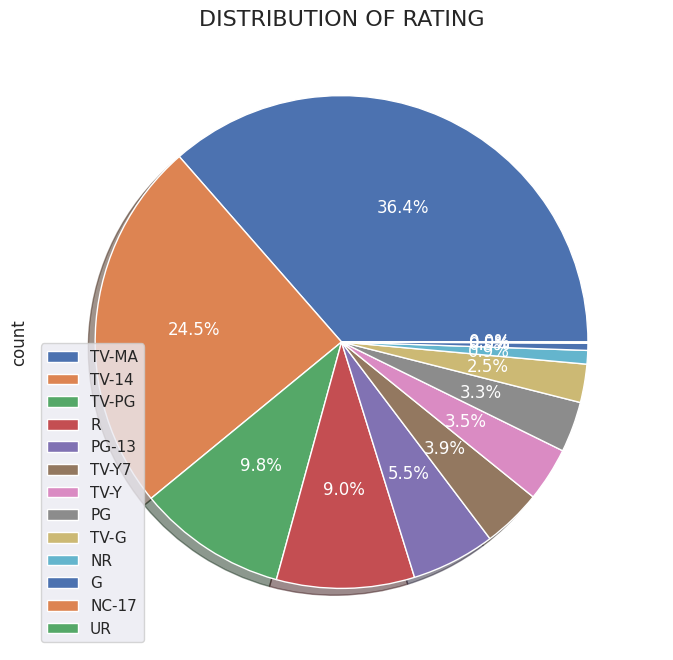

In [21]:
# 4. PIE CHART (with %)    ------> Variables | type |
################################################################################ Pie-chart for Rating
plt.figure(figsize=(10,8))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',
                                   shadow=True,
                                   figsize=(10,8),
                                   textprops={'color': "w", 'fontsize': 12})
plt.title('DISTRIBUTION OF RATING', fontsize=16)
plt.legend(labels=df['rating'].value_counts().index, loc='best')
plt.show()

In [22]:
# WordCloud
#####################
from wordcloud import WordCloud

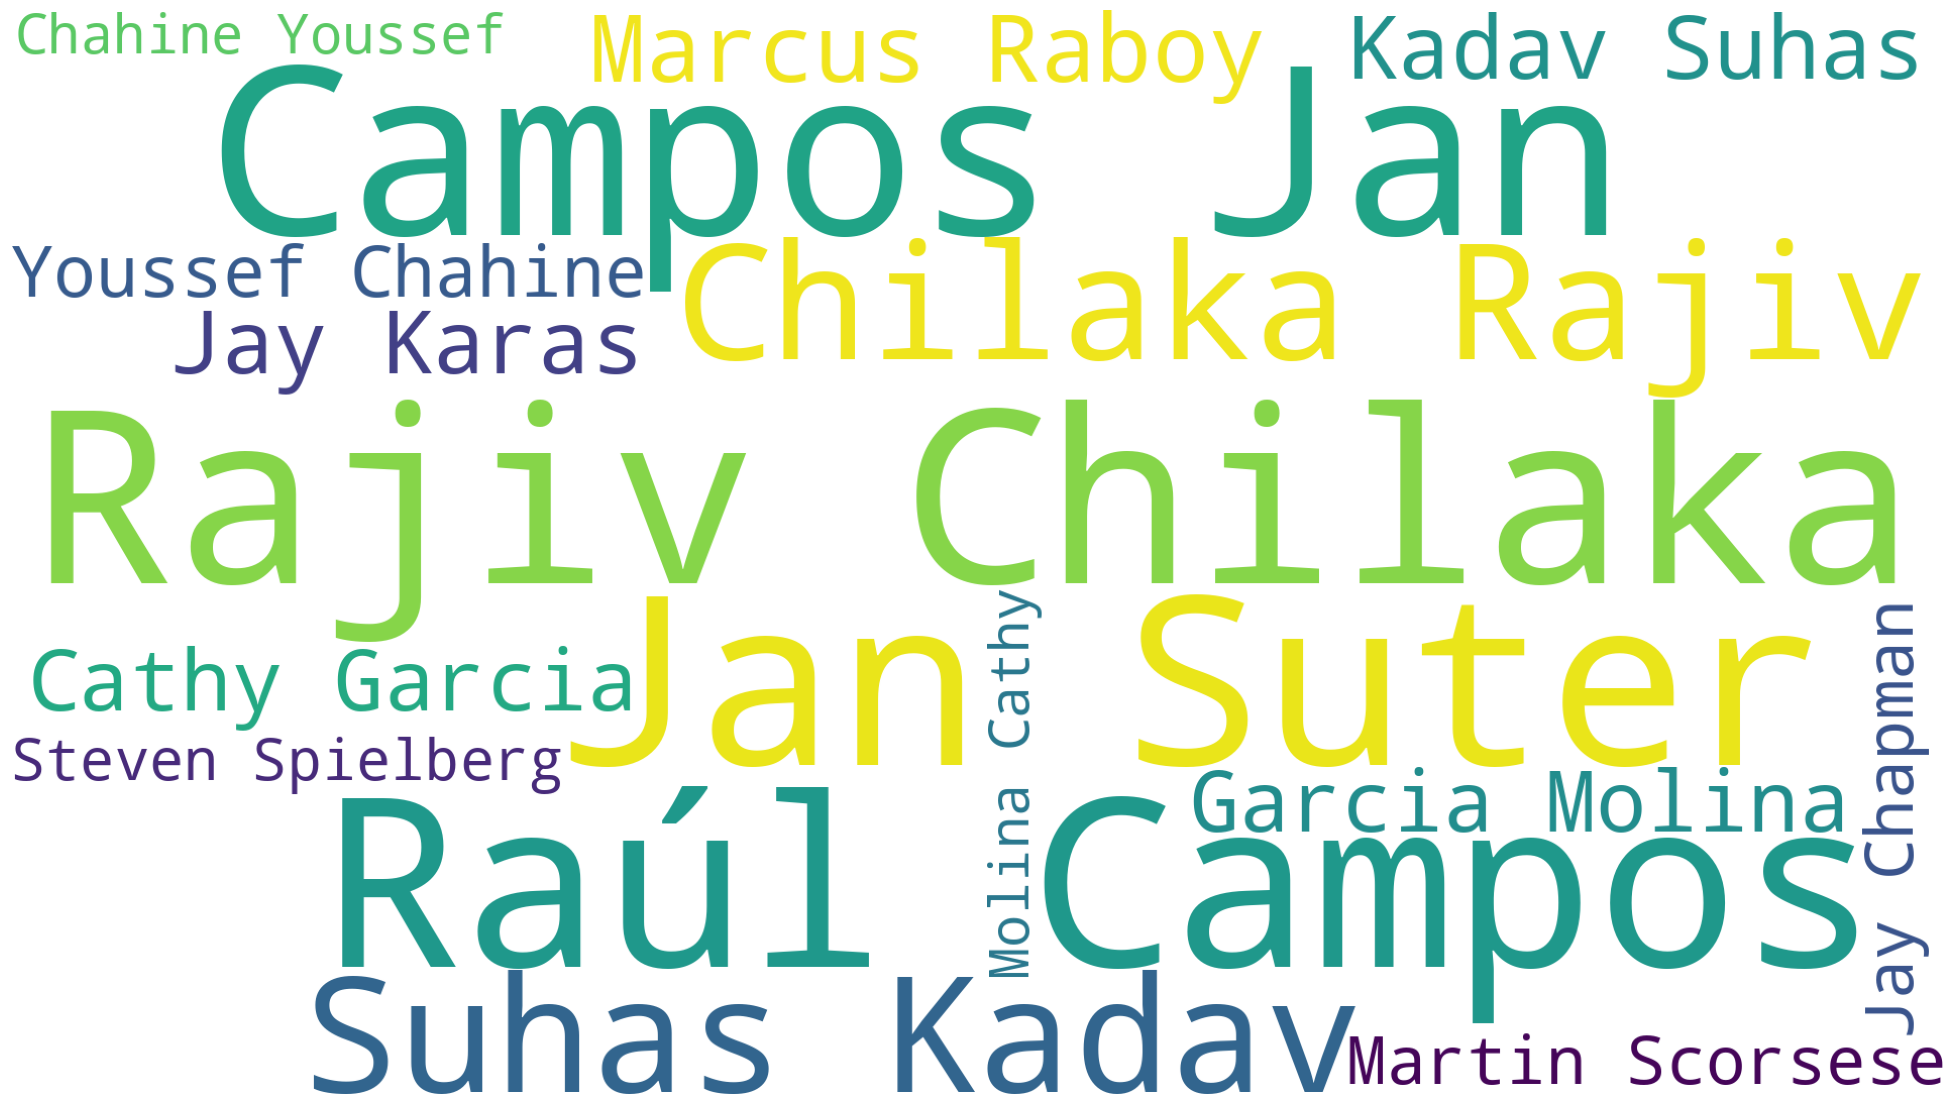

In [66]:
# 5. Cloud of Ideas   ------> Variables | top 10 directors |
################################################################################
df_filtered = df[df['director'] != "NULL"]
# Get the 10 most frequent directors
top_10_directors = df_filtered['director'].value_counts().head(10).index.tolist()

# Filter DataFrame to include only the top 10 directos
df_top_10 = df_filtered[df_filtered['director'].isin(top_10_directors)]

# Create WordCloud
wordcloud = WordCloud(
    background_color='white',
    width=1920,
    height=1080
).generate(" ".join(df_top_10['director']))

plt.figure(figsize=(25,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('top_10_directors.png')
plt.show()

> **4. RECOMMENDATION SYSTEM**

---

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8636 non-null   object
 1   type          8636 non-null   object
 2   title         8636 non-null   object
 3   director      8636 non-null   object
 4   cast          8636 non-null   object
 5   country       8636 non-null   object
 6   date_added    8636 non-null   object
 7   release_year  8636 non-null   int64 
 8   rating        8633 non-null   object
 9   duration      8636 non-null   object
 10  listed_in     8636 non-null   object
 11  description   8636 non-null   object
dtypes: int64(1), object(11)
memory usage: 877.1+ KB


In [31]:
print("\nValores faltantes en df_net:")
print(missing(df_net))                  # Data at startup

print("Valores faltantes en df:")
print(missing(df))                      # Data at the end


Valores faltantes en df_net:
          Column  Missing_value_count  Missing_Percentage (%)
3       director                 2634                   29.91
5        country                  831                    9.44
4           cast                  825                    9.37
6     date_added                   10                    0.11
8         rating                    4                    0.05
9       duration                    3                    0.03
0        show_id                    0                    0.00
1           type                    0                    0.00
2          title                    0                    0.00
7   release_year                    0                    0.00
10     listed_in                    0                    0.00
11   description                    0                    0.00
Valores faltantes en df:
          Column  Missing_value_count  Missing_Percentage (%)
8         rating                    3                    0.03
0        show_i

In [36]:
# 1. Create new data "df_recomm" & Transform null values to empty string
################################################################
df_recomm = df.fillna('')

In [37]:
# 2. Define an object to Clean and transform
################################################################
def data_cleaning(x):
    return str.lower(x.replace(" ", ""))

In [41]:
# 3. Define specific columns to filter
################################################################
data_features = ['title', 'director', 'cast', 'listed_in', 'description']

df_recomm = df_recomm[data_features]
df_recomm.head(3)

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NULL,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NULL,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [42]:
# 4. Applying "data_cleaning" in "data_features"
################################################################
for feature in data_features:
    df_recomm[feature] = df_recomm[feature].apply(data_cleaning)

df_recomm.head(3)

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,null,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,null,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."


In [43]:
# 5. Defines the concatenation of the values
################################################################
def content_include(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [44]:
# 6. Applying function and create new column
################################################################
df_recomm['joined_columns'] = df_recomm.apply(content_include, axis = 1) # axis = 1 (Apply to each row)

# Verifying
df_recomm.head(3)

,title,director,cast,listed_in,description,joined_columns
0,dickjohnsonisdead,kirstenjohnson,null,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson null document...
1,blood&water,null,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water null amaqamata,khosingema,gailmaba..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...","ganglands julienleclercq samibouajila,tracygot..."


In [45]:
# Import required libraries
from sklearn.feature_extraction.text import CountVectorizer       # Display the frequency of each word
from sklearn.metrics.pairwise import cosine_similarity            # Calculate similitude between VECTORS

In [50]:
# 7. Using COUNTVECTORIZER
################################################################
countvec = CountVectorizer(stop_words='english')                                # Remove common english words
countvec_matrix = countvec.fit_transform(df_recomm['joined_columns'])           # Learn and convert each document in a vector of term counts

print(countvec_matrix.shape)

(8636, 74908)


In [52]:
# 8. Measuring similarity content
################################################################
# Measuring similarity between content descriptions based on word frequency
cosine_sim = cosine_similarity(countvec_matrix, countvec_matrix)

# A new column is created that retains these original indexes
new_netflix_data=df_recomm.reset_index()

# Extracts the row indexes.
# Sets the index of this Series as the titles of the movies/series in the DF.
indices = pd.Series(df_recomm.index, index=df_recomm['title'])

In [55]:
# 9. Define de function for get new recommendations
################################################################
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

# 10. Get the main features of my search
################################################################
    sim_scores = list(enumerate(cosine_sim[idx]))
        # Gets the pairwise similarity scores of all movies with that movie selected.

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the movies according to similarity scores

    sim_scores = sim_scores[1:11]
        # Get the top 10 similarity score movies
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [61]:
# Result n°1 : A list with the titles of the 10 most similar movies to "Alien TV".
get_recommendations_new('Alien TV', cosine_sim)

,title
1517,Ma Rainey's Black Bottom
5010,Love Beats Rhymes
3709,ANIMA
7943,Satrangi Re
1518,Ma Rainey's Black Bottom: A Legacy Brought to ...
4972,Paradox
4975,Secret Superstar
5441,The Wishing Tree
8341,The Help
1214,Quiet


In [63]:
# Result n°2 : A list with the titles of the 10 most similar movies to "The Walking Dead".
get_recommendations_new('The Walking Dead', cosine_sim)

,title
698,Fan Girl
4783,The Skin of the Wolf
6028,A Billion Colour Story
633,Into the Wind
3740,Pihu
4306,ROMA
4357,Manto
3254,Mallesham
3797,Joy
4740,Invisible


In [65]:
# Result n°3 : A list with the titles of the 10 most similar movies to "ROMA".
get_recommendations_new('ROMA', cosine_sim)

,title
234,Oggy Oggy
522,Larva
5877,Sammy & Co
8423,The Minimighty Kids
8803,Zombie Dumb
1952,Mighty Little Bheem
3953,Kicko & Super Speedo
936,Miniforce: Super Dino Power
123,Luv Kushh
263,Mother Goose Club
